# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [2]:
import numpy as np

a = np.array([[1,2,3], [2,3,4]])
print(a.ndim, a.shape, a.size, a.dtype, type(a))

b = np.zeros((3,4))
c = np.ones((3,4))
d = np.random.randn(2,3)
print(d)
e = np.array([[1,2], [2,3], [3,4]])
f = b*2 - c*3
g = 2*c*f
h = np.dot(a,e)
i = d.mean()
j = d.max(axis=1)
k = a[-1][:2]

# You can print a to k for details

2 (2, 3) 6 int32 <class 'numpy.ndarray'>
[[ 0.68754949  0.79927742 -1.1591592 ]
 [ 0.82440004 -1.2428679  -0.67408502]]


matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [3]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2)
print(x)

plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.')
plt.show()

[2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4
 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.
 9.2 9.4 9.6 9.8]


<Figure size 640x480 with 1 Axes>

If you want to print them in different graphs, try this:

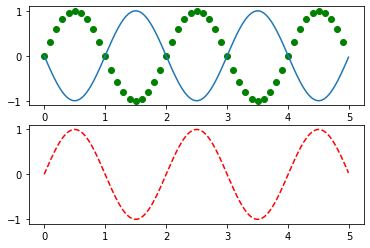

In [4]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

plt.subplot(211)
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(212)
plt.plot(x2, f(x2), 'r--')
plt.show()

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

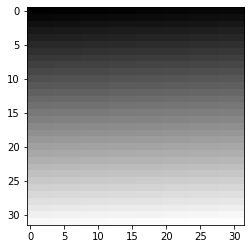

In [5]:
img = np.arange(0, 1, 1/32/32) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 32) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
plt.imshow(img, cmap='gray')
plt.show()

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

C:\Users\mingy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\mingy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


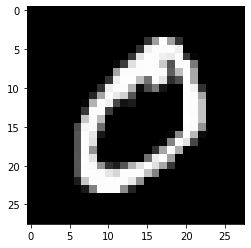

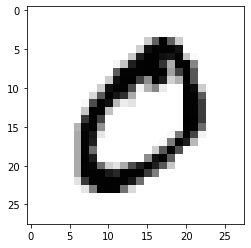

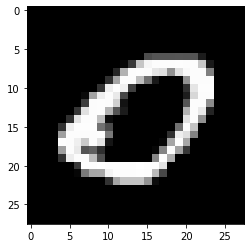

In [6]:
from sklearn.datasets import fetch_mldata

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

# make the value of pixels from [0, 255] to [0, 1] for further process
X = mnist.data / 255.
Y = mnist.target

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [8]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [9]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train,Y_train)

lr_y_predict = lr.predict(X_test)
test_accuracy =  metrics.accuracy_score(Y_test,lr_y_predict)
train_accuracy = metrics.accuracy_score(Y_train,lr.predict(X_train))


print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

C:\Users\mingy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mingy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 96.03%
Testing accuracy: 88.80%


#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [10]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB()

bayes.fit(X_train,Y_train)

bayes_y_predict =bayes.predict(X_test)
test_accuracy =  metrics.accuracy_score(Y_test,bayes_y_predict)
train_accuracy = metrics.accuracy_score(Y_train,bayes.predict(X_train))



print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 83.90%
Testing accuracy: 82.60%


#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [11]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC

svc = LinearSVC()

svc.fit(X_train,Y_train)

svc_y_predict = svc.predict(X_test)
test_accuracy =  metrics.accuracy_score(Y_test,svc_y_predict)
train_accuracy = metrics.accuracy_score(Y_train,svc.predict(X_train))





print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 98.52%
Testing accuracy: 86.50%


C:\Users\mingy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

In [22]:
# TODO:use SVM with another group of parameters
from sklearn.svm import SVC

svc2 = SVC(C =10,gamma = 0.01)

svc2.fit(X_train,Y_train)

svc2_y_predict = svc2.predict(X_test)
test_accuracy =  metrics.accuracy_score(Y_test,svc2_y_predict)
train_accuracy = metrics.accuracy_score(Y_train,svc2.predict(X_train))



print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 100.00%
Testing accuracy: 95.30%
